In [ ]:
import pandas as pd

try:
  file_id = '1MlRKZtM2h3M9WLqf37d6fEB2D4zRpNoI'
  df = pd.read_csv(f'https://drive.google.com/uc?export=download&id={file_id}')
except FileNotFoundError:
    print("Erreur: Le fichier Mall_Customers.csv n'a pas été trouvé. Veuillez vérifier le chemin.")


C'est ici qu'on charge le fichier Mall_customers.csv depuis un lien drive



In [ ]:
print("Vérification des valeurs manquantes:")
print(df.isnull().sum())

quantitative_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[quantitative_vars] = scaler.fit_transform(df[quantitative_vars])

print("\nVariables quantitatives après standardisation:")
print(df[quantitative_vars].head())

Vérification des valeurs manquantes:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Variables quantitatives après standardisation:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


Toutes les colonnes donnes 0 donc pas de valeurs manquantes.
La standardisation ici permet de mettre a l'echelle pour avoir une moyenne de 0 et un ecart-type de 1.

Histogrammes des variables quantitatives:


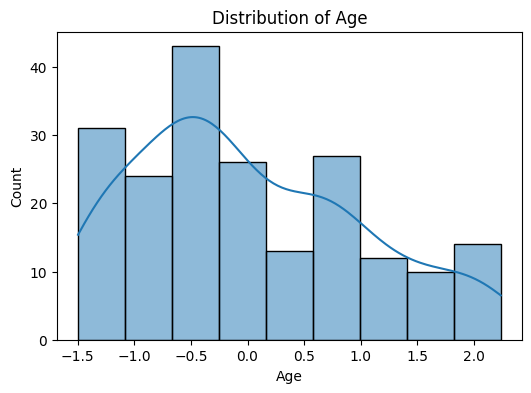

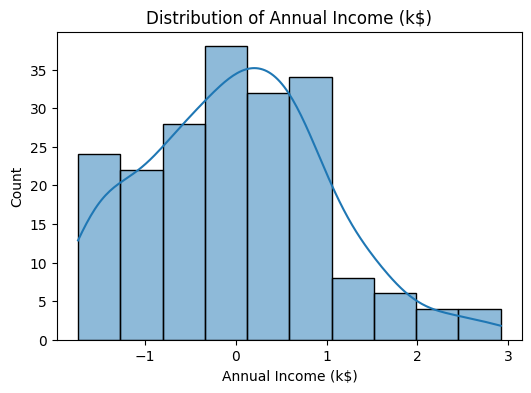

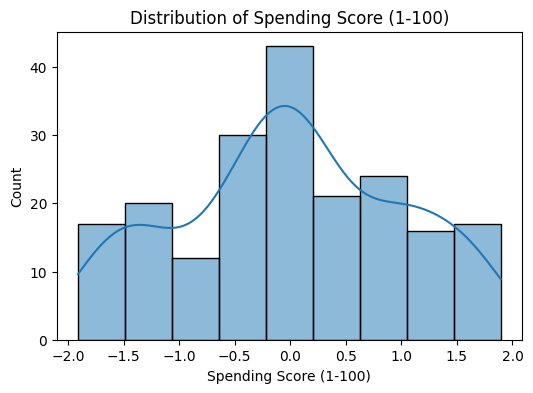

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

quantitative_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

print("Histogrammes des variables quantitatives:")
for var in quantitative_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()


Boxplots des variables quantitatives:


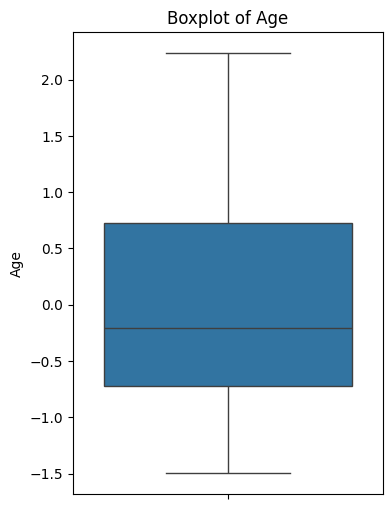

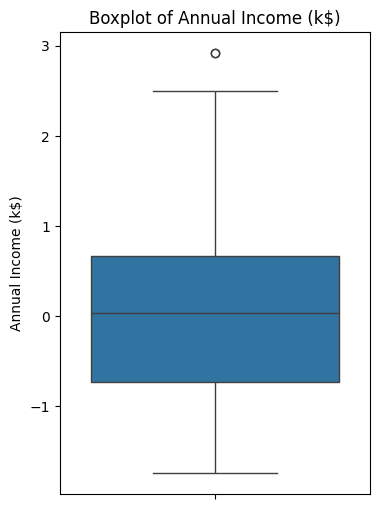

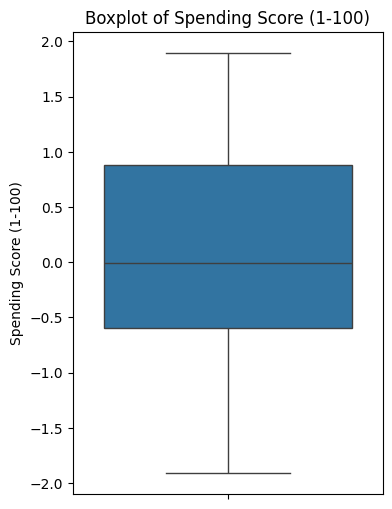

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

quantitative_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

print("\nBoxplots des variables quantitatives:")
for var in quantitative_vars:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

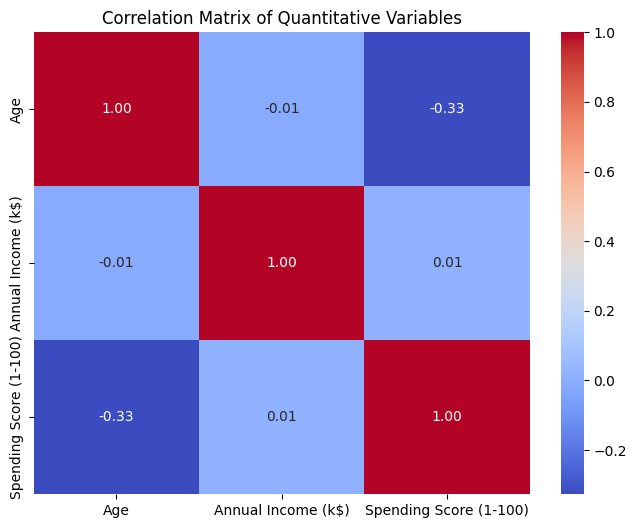

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

quantitative_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# EDA multivariée: Matrice de corrélation pour les variables quantitatives
correlation_matrix = df[quantitative_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Quantitative Variables')
plt.show()

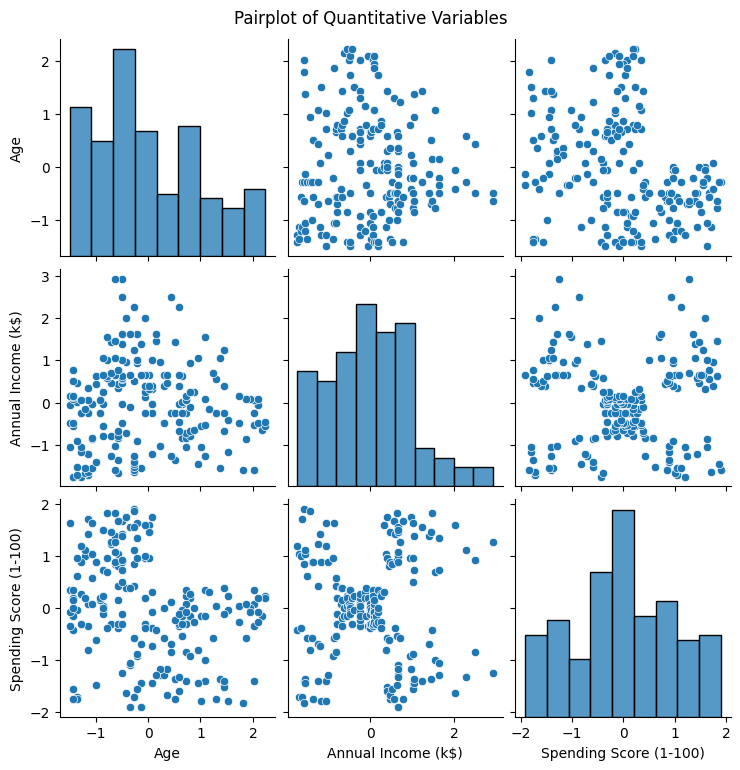

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

quantitative_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# EDA multivariée: Scatter-plot matrix pour les variables quantitatives
sns.pairplot(df[quantitative_vars])
plt.suptitle('Pairplot of Quantitative Variables', y=1.02)
plt.show()

In [ ]:
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)
    print("\nColonne 'CustomerID' supprimée.")

print("\nDataFrame après sélection/ingénierie des features (si applicable):")
print(df.head())


Colonne 'CustomerID' supprimée.

DataFrame après sélection/ingénierie des features (si applicable):
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    Male -1.424569           -1.738999               -0.434801
1    Male -1.281035           -1.738999                1.195704
2  Female -1.352802           -1.700830               -1.715913
3  Female -1.137502           -1.700830                1.040418
4  Female -0.563369           -1.662660               -0.395980



DataFrame après one-hot encoding pour 'Gender':
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.424569           -1.738999               -0.434801         True
1 -1.281035           -1.738999                1.195704         True
2 -1.352802           -1.700830               -1.715913        False
3 -1.137502           -1.700830                1.040418        False
4 -0.563369           -1.662660               -0.395980        False


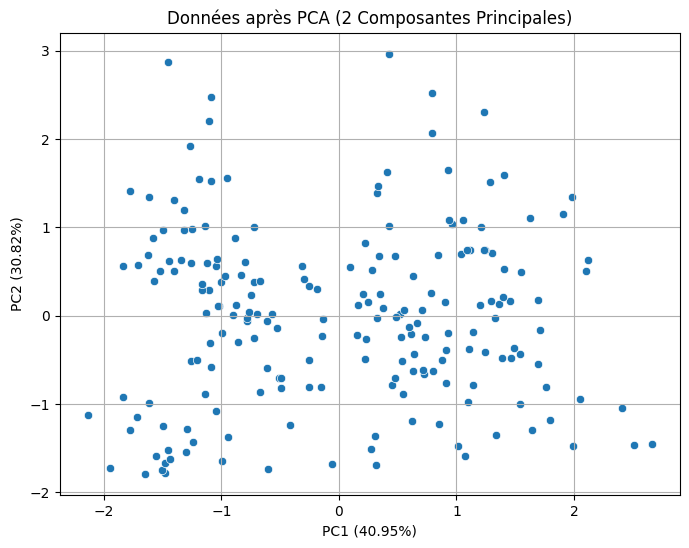

Variance expliquée par la première composante principale: 0.4095
Variance expliquée par la deuxième composante principale: 0.3082
Variance cumulée expliquée par les 2 premières composantes: 0.7177


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)
    print("\nColonne 'CustomerID' supprimée.")

X = pd.get_dummies(df, columns=['Gender'], drop_first=True)

print("\nDataFrame après one-hot encoding pour 'Gender':")
print(X.head())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Données après PCA (2 Composantes Principales)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.show()

print(f"Variance expliquée par la première composante principale: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Variance expliquée par la deuxième composante principale: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Variance cumulée expliquée par les 2 premières composantes: {(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]):.4f}")

Pour K = 2, Score de Silhouette = 0.3032
Pour K = 3, Score de Silhouette = 0.3150
Pour K = 4, Score de Silhouette = 0.3503
Pour K = 5, Score de Silhouette = 0.3498
Pour K = 6, Score de Silhouette = 0.3565


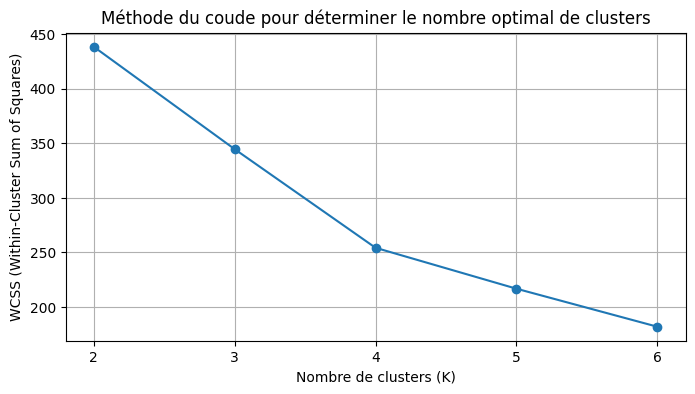

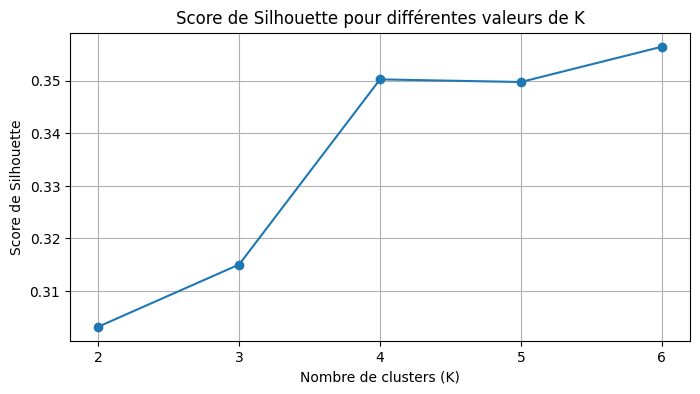

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

X = df.copy()


X = pd.get_dummies(X, columns=['Gender'], drop_first=True)


wcss = []
silhouette_scores = []
k_values = range(2, 7)


for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)


    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Pour K = {k}, Score de Silhouette = {score:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Score de Silhouette pour différentes valeurs de K')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de Silhouette')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Centroïdes des clusters (pour K=5, variables standardisées):
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0  1.198627           -0.460981               -0.327038     0.431034
1 -0.441917            0.991583                1.239503     0.461538
2 -0.781722           -0.403069               -0.215914     0.340426
3  0.173295            1.066454               -1.298010     0.588235
4 -0.974396           -1.329545                1.132178     0.409091


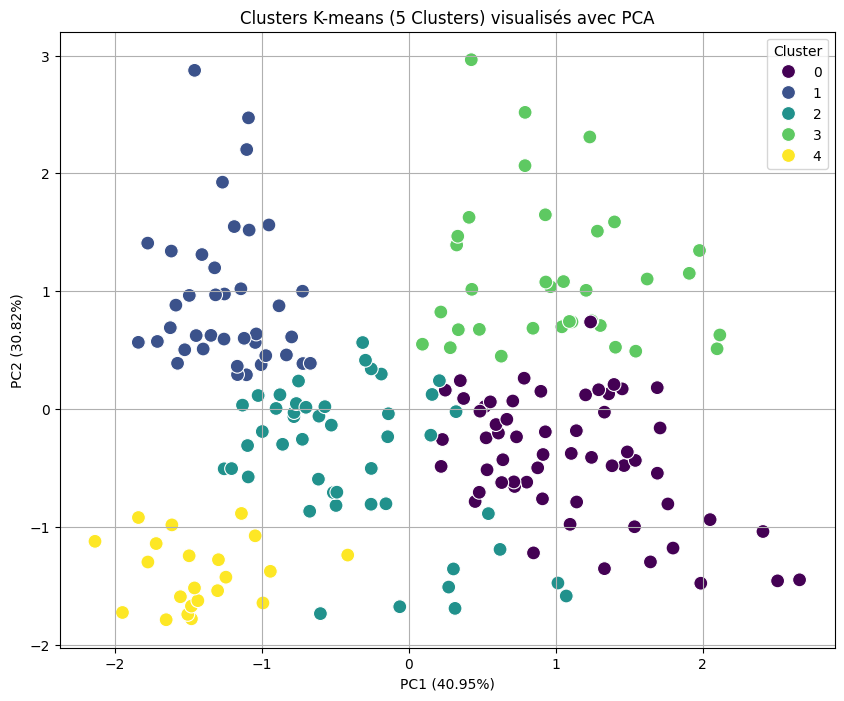

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

optimal_k = 5

kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(X)

df_clustered = df.copy()
df_clustered['Cluster'] = kmeans_final.labels_


print(f"\nCentroïdes des clusters (pour K={optimal_k}, variables standardisées):")
centroids = pd.DataFrame(kmeans_final.cluster_centers_, columns=X.columns)
print(centroids)

if 'X_pca' in locals():
    df_pca_clustered = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    df_pca_clustered['Cluster'] = kmeans_final.labels_

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca_clustered, palette='viridis', s=100)
    plt.title(f'Clusters K-means ({optimal_k} Clusters) visualisés avec PCA')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    plt.grid(True)
    plt.legend(title='Cluster')
    plt.show()
else:
    print("\nLes résultats de la PCA (X_pca) ne sont pas disponibles pour la visualisation des clusters.")